<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_8_Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ICE-8 Image Filtering

## (Tutorial) CNN
Feature detectors can be set up with different values to get different results.

For example, a filter can be applied that can sharpen and focus an image or blur an image. That would give equal importance to all the values. You can do edge enhancement, edge detection, and more. You would do that by applying different feature detectors to create different feature maps. The computer is able to determine which filters make the most sense and apply them.

The primary purpose here is to find features in your image, put them into a feature map, and still preserve the spatial relationship between pixels. That’s important so that the pixels don’t get all jumbled up.

* use pip install opencv-python to install cv2


Use this image https://drive.google.com/file/d/1OFAD7GGVQeKYPyp-0XZn3cxR4h9FblIz/view?usp=sharing

We’re going to use this above given image for our input image.

We’ll make it black and white

### **Upload the image above as cat.jpg in your notebook for the tutorial to work**

In [ ]:
#!pip install opencv-python

In [ ]:
!gdown  '13bmadlWV1BbkYKEgTjBN2NU9RuImRCXV'

Downloading...
From: https://drive.google.com/uc?id=13bmadlWV1BbkYKEgTjBN2NU9RuImRCXV
To: /content/cat.jpg
100% 67.6k/67.6k [00:00<00:00, 88.7MB/s]


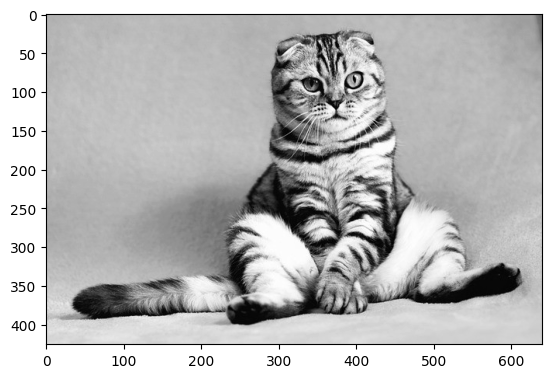

In [ ]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_path = 'cat.jpg'
# Load color image
bgr_img = cv2.imread(img_path)
# Convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# Normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255
# Plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [ ]:
#Let’s define and visualize our filters

import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [ ]:
# Define four different filters, all of which are linear combinations of the `filter_vals` defined above
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
# Print out the values of filter 1 as an example
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [ ]:
#Now let’s define a convolutional layer (using PyTorch)


import torch
import torch.nn as nn
import torch.nn.functional as F

# Neural network with one convolutional layer with four filters
class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    def forward(self, x):
            # Calculates the output of a convolutional layer pre- and post-activation
            conv_x = self.conv(x)
            activated_x = F.relu(conv_x)

            # Returns both layers
            return conv_x, activated_x

# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [ ]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        #ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.imshow(np.squeeze(layer[i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

## Task 1. Write code for the following tasks below :

- Plot original image
- Visualize all of the filters (4)
- Convert the image into an input tensor


In [ ]:
#code here

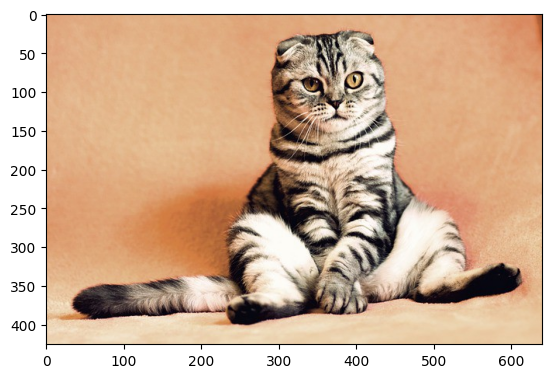

In [ ]:
#plotting original image
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()


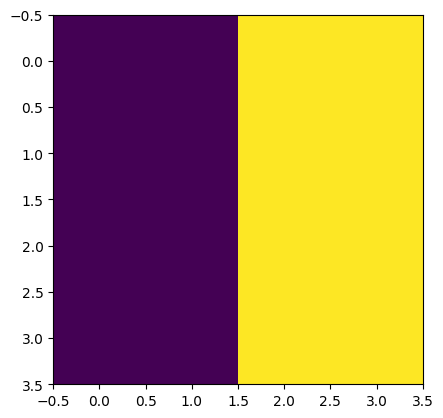

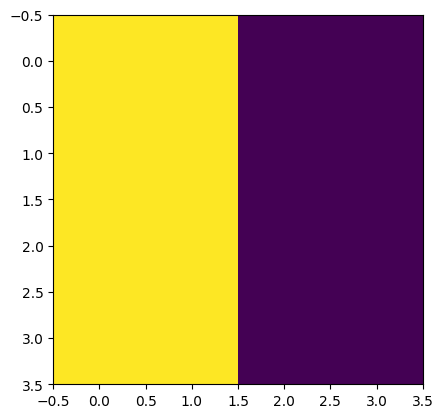

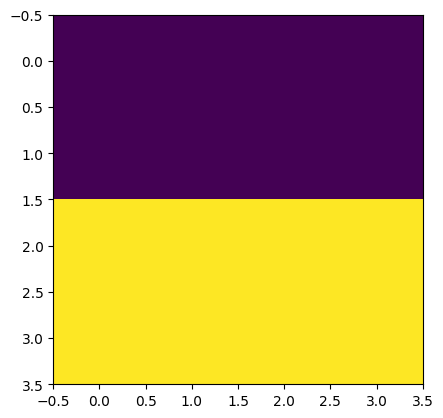

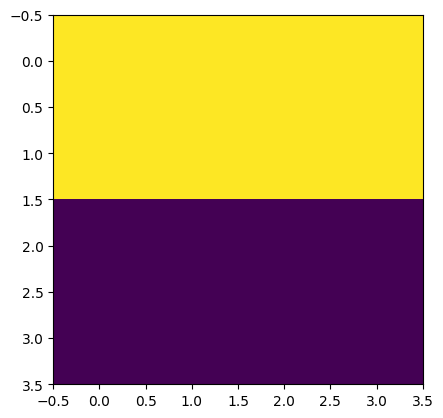

In [ ]:
#visualizing filters
plt.imshow(filter_1)
plt.show()

plt.imshow(filter_2)
plt.show()

plt.imshow(filter_3)
plt.show()

plt.imshow(filter_4)
plt.show()


In [ ]:
#image to tensor
from torchvision import transforms


convert_tensor = transforms.ToTensor()

cat_tensor = convert_tensor(rgb_img)

print(cat_tensor)

tensor([[[0.8863, 0.8863, 0.8824,  ..., 0.6471, 0.6627, 0.7020],
         [0.8824, 0.8824, 0.8824,  ..., 0.6392, 0.6471, 0.6784],
         [0.8902, 0.8902, 0.8902,  ..., 0.6314, 0.6235, 0.6471],
         ...,
         [0.9255, 0.9255, 0.9216,  ..., 0.9176, 0.9176, 0.9216],
         [0.9294, 0.9333, 0.9373,  ..., 0.9176, 0.9176, 0.9176],
         [0.9333, 0.9333, 0.9412,  ..., 0.9176, 0.9176, 0.9176]],

        [[0.6549, 0.6549, 0.6510,  ..., 0.3569, 0.3725, 0.4157],
         [0.6510, 0.6510, 0.6510,  ..., 0.3490, 0.3569, 0.3922],
         [0.6471, 0.6471, 0.6471,  ..., 0.3412, 0.3333, 0.3608],
         ...,
         [0.8275, 0.8275, 0.8235,  ..., 0.7922, 0.7922, 0.7961],
         [0.8392, 0.8431, 0.8471,  ..., 0.7922, 0.7922, 0.7922],
         [0.8431, 0.8431, 0.8510,  ..., 0.7922, 0.7922, 0.7922]],

        [[0.4980, 0.4980, 0.4941,  ..., 0.2039, 0.2353, 0.2784],
         [0.4941, 0.4941, 0.4941,  ..., 0.2039, 0.2196, 0.2549],
         [0.4941, 0.4941, 0.4941,  ..., 0.1961, 0.1961, 0.

## Task 2. Write code for the following tasks below :

- Get the convolutional layer (pre and post activation)
   
   variables to use are **conv_lyr, changed_lyr**

- Visualize the output of a convolutional layer

In [ ]:
#code here

In [ ]:
cat_bgr_img = cv2.imread(img_path)
# Convert to grayscale
cat_gray_img = cv2.cvtColor(cat_bgr_img, cv2.COLOR_BGR2GRAY)
#converting to tensor
cat_gray_tensor = convert_tensor(gray_img)

#calling forward function from model given using gray tensor, using variables conv_lyr, changed_lyr mentioned in task
model.eval()
with torch.no_grad():
    conv_lyr, changed_lyr = model.forward(cat_gray_tensor)

#feature_maps.shape
print(conv_lyr.shape)
print(changed_lyr.shape)

#printing values of 1st image from map
print(conv_lyr[0])

torch.Size([4, 423, 637])
torch.Size([4, 423, 637])
tensor([[ 0.0000e+00, -7.8430e-03, -1.9608e-02,  ..., -2.3529e-01,
         -7.4510e-02,  1.2157e-01],
        [ 1.9608e-02,  1.1921e-07, -1.5686e-02,  ..., -2.9412e-01,
         -1.8824e-01, -7.8431e-03],
        [ 3.5294e-02,  1.5686e-02, -7.8431e-03,  ..., -3.0196e-01,
         -2.4314e-01, -1.0588e-01],
        ...,
        [-1.5686e-02,  1.1765e-02,  3.1373e-02,  ...,  1.1765e-02,
          1.5686e-02,  2.3529e-02],
        [ 3.9214e-03,  3.1372e-02,  4.3137e-02,  ...,  0.0000e+00,
          1.1765e-02,  1.9608e-02],
        [ 2.7451e-02,  4.7059e-02,  4.7059e-02,  ..., -7.8430e-03,
          3.9215e-03,  1.1765e-02]])


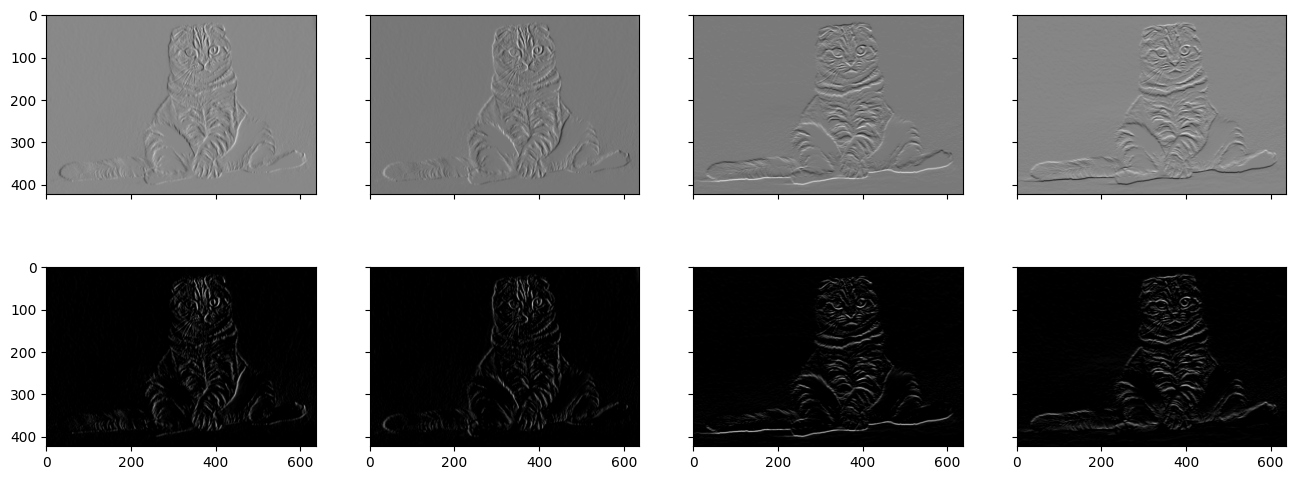

In [ ]:
#visualizing output of convolutional layer, before and after activation

fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16,6))
for i in range(0, 4):
    ax[0][i].imshow(conv_lyr[i], cmap='gray')
    ax[1][i].imshow(changed_lyr[i], cmap='gray')
plt.show()

## Task 3. Write code for the following tasks below :

### - convert image to grayscale for filtering and print it

In [ ]:
#code here

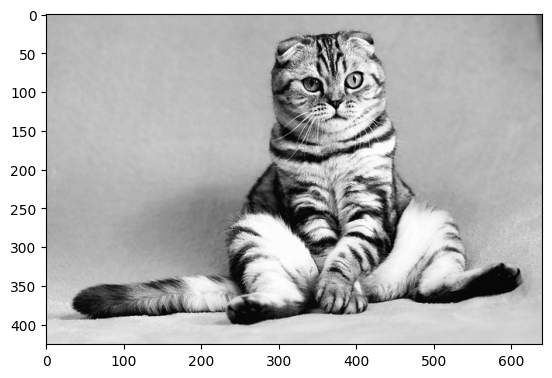

In [ ]:
cat_bgr_img = cv2.imread(img_path)
# Convert to grayscale
cat_gray_img = cv2.cvtColor(cat_bgr_img, cv2.COLOR_BGR2GRAY)

plt.imshow(cat_gray_img, cmap='gray')
plt.show()

## Task 4. Write code for the following tasks below :

 - create a custom kernel and apply edge detection filter and print it

##HINT : Sobel operator

In [ ]:
#code here

In [ ]:
#using sobel x and y as kernel

filter_sobel_sx = np.array([[ -1, 0, 1], [ -2, 0, 2], [ -1, 0, 1]])
print('Filter shape sx: ', filter_sobel_sx.shape)

filter_sobel_sy = np.array([[ 1, 2, 1], [ 0, 0, 0], [ -1, -2, -1]])
print('Filter shape sy: ', filter_sobel_sx.shape)

filters_sobel = np.array([filter_sobel_sx, filter_sobel_sy])

Filter shape sx:  (3, 3)
Filter shape sy:  (3, 3)


In [ ]:
#Now let’s define a convolutional layer (using PyTorch)

import torch
import torch.nn as nn
import torch.nn.functional as F

# Neural network with one convolutional layer with two filters
class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 2 defined filters
        k_height, k_width = weight.shape[2:]
        # Assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 2, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
    def forward(self, x):
            # Calculates the output of a convolutional layer pre- and post-activation
            conv_x = self.conv(x)
            activated_x = F.relu(conv_x)

            # Returns both layers
            return conv_x, activated_x

# Instantiate the model and set the weights
weight = torch.from_numpy(filters_sobel).unsqueeze(1).type(torch.FloatTensor)
model_sobel = Net(weight)
# Print out the layer in the network
print(model_sobel)

Net(
  (conv): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), bias=False)
)


In [ ]:
#calling sobel kernel forward function

model.eval()
with torch.no_grad():
    conv_lyr_s, changed_lyr_s = model_sobel.forward(cat_gray_tensor)

conv_lyr_s.shape

torch.Size([2, 424, 638])

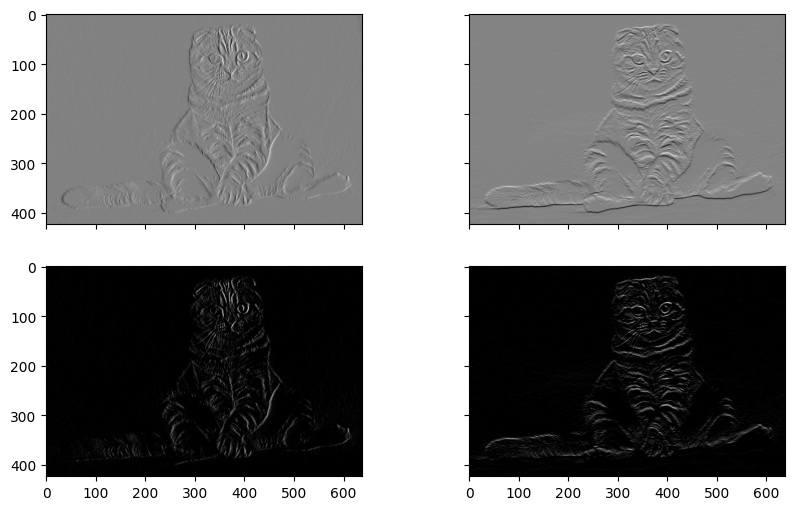

In [ ]:
#printing before and after activation values for sobel
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,6))
for i in range(0, 2):
    ax[0][i].imshow(conv_lyr_s[i], cmap='gray')
    ax[1][i].imshow(changed_lyr_s[i], cmap='gray')
plt.show()

## Question 1. What are different types of edge detection filters .

State why sobel operator is useful here .

What did we acheive from it ?

### answer here

## Task 5. No need to code for this task

### **If all tasks above are done properly this task will work**

#### HINT : read task 2 question properly as I have pointed out what variable name to use which is used in this task


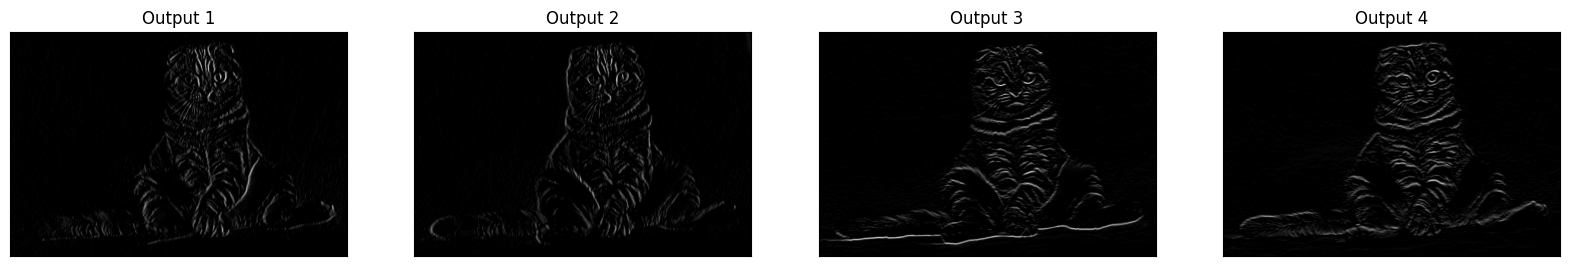

In [ ]:
viz_layer(changed_lyr)

## Question 2. What are different types of edge detection filters .
#### HINT : Please refer lecture 8 slides .

Task 5 falls under which **building block of CNN**
Explain the importance of that block in CNN.
Explain why that block helps in task 5 and what it did .

### Answer here